In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline


In [2]:
data_dir = "./data/"


In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,PM,5,Research,CRA,NoAnswer,Heterosexual,Black,...,True,True,True,False,False,False,False,False,False,False
1,70000,0,Employee,PM,5,Research,CRA,NoAnswer,Heterosexual,Black,...,True,False,False,False,True,False,True,True,False,False
2,70001,1,Employee,PM,2,Security,NRCan,NoAnswer,Heterosexual,Caucasian,...,True,True,True,False,False,False,False,False,False,False
3,70001,1,Employee,PM,2,Security,NRCan,NoAnswer,Heterosexual,Caucasian,...,True,True,False,False,True,False,True,False,False,False
4,70002,2,Employee,IS,2,Audit,PS,NoAnswer,Heterosexual,Black,...,True,True,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,eval_id,learner_id,level,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.00000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.396449,99624.641524,960.199067,181.865474,2.578992,4.735550,3.01471,7.150467,0.784707
std,7906.514896,7906.514896,1.815167,73716.390247,94.998638,96.418462,1.845355,1.919206,1.91132,2.246500,0.188182
min,70000.000000,0.000000,1.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.00000,3.000000,0.000000
25%,73428.750000,3428.750000,2.000000,30428.750000,880.000000,101.000000,1.000000,3.000000,2.00000,5.000000,0.700000
50%,77357.500000,7357.500000,3.000000,70357.500000,884.000000,102.000000,2.000000,5.000000,3.00000,7.000000,0.800000
75%,89570.250000,19570.250000,5.000000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.00000,9.000000,1.000000
max,91999.000000,21999.000000,7.000000,192999.000000,1078.000000,301.000000,10.000000,12.000000,11.00000,10.000000,1.000000


In [6]:
audience = df.audience
role = df.role

In [7]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [8]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                      
Employee   Administrative Asian       2.944000                0.056000   
                          Black       2.709402                0.119658   
                          Caucasian   2.766284                0.072797   
                          Indigenous  2.923077                0.076923   
                          Maui        2.730769                0.061538   
...                                        ...                     ...   
Specialist Security       Black       2.411765                0.000000   
                          Caucasian   3.151515                0.000000   
                          Indigenous  3.090909                0.045455   
                          Maui        3.500000                0.000000   
                          NoAnswer    3.357143                0.000000   

                                          module  current_skill  \
audience   role           ethnicity                               
Employee   Administrative Asian       181.312000       2.544000   
                          Black       179.948718       2.760684   
                          Caucasian   181.762452       2.747126   
                          Indigenous  185.051282       2.427350   
                          Maui        169.030769       2.330769   
...                                          ...            ...   
Specialist Security       Black       160.176471       2.294118   
                          Caucasian   192.181818       1.848485   
                          Indigenous  174.045455       2.636364   
                          Maui        201.250000       3.187500   
                          NoAnswer    187.000000       3.214286   

                                      desired_skill  final_skill  recommend  \
audience   role           ethnicity                                           
Employee   Administrative Asian            4.584000     2.920000   0.704000   
                          Black            4.888889     3.162393   0.743590   
                          Caucasian        4.816092     3.191571   0.739464   
                          Indigenous       4.589744     2.914530   0.717949   
                          Maui             4.484615     2.784615   0.692308   
...                                             ...          ...        ...   
Specialist Security       Black            4.411765     2.882353   0.764706   
                          Caucasian        3.878788     2.242424   0.818182   
                          Indigenous       4.727273     2.909091   0.636364   
                          Maui             5.250000     3.625000   0.687500   
                          NoAnswer         5.285714     3.571429   0.642857   

                                        rating     clear  entertaining  ...  \
audience   role           ethnicity                                     ...   
Employee   Administrative Asian       6.888000  0.432000      0.360000  ...   
                          Black       7.119658  0.478632      0.384615  ...   
                          Caucasian   6.931034  0.478927      0.417625  ...   
                          Indigenous  7.247863  0.504274      0.461538  ...   
                          Maui        6.853846  0.423077      0.423077  ...   
...                                        ...       ...           ...  ...   
Specialist Security       Black       7.470588  0.470588      0.470588  ...   
                          Caucasian   7.757576  0.575758      0.424242  ...   
                          Indigenous  6.636364  0.500000      0.136364  ...   
                          Maui        6.937500  0.375000      0.312500  ...   
                          NoAnswer    6.500000  0.428571      0.428571  ...   

                                      digital_content  digital_smooth  \
audience   role           ethnicity                                     
Empl

In [9]:
scan.groupby('module').agg('mean')

,level,person_with_disability,current_skill,desired_skill,final_skill,recommend,rating,clear,entertaining,relevant,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.380000,0.052667,2.572667,4.730667,2.708889,0.679556,6.652444,0.262667,0.251333,0.246000,...,1.0,0.521333,0.414000,0.464000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.380000,0.052667,2.572667,4.730667,3.492222,0.739333,7.090444,0.527333,0.443111,0.547556,...,1.0,0.292444,0.307111,0.146444,1.0,0.310444,0.592000,0.417778,0.340444,0.529333
201,3.504630,0.069444,2.675926,4.805556,2.722222,0.509259,5.648148,0.277778,0.296296,0.347222,...,0.0,0.000000,0.000000,0.000000,1.0,0.421296,0.226852,0.208333,0.379630,0.273148
202,3.504630,0.069444,2.675926,4.805556,3.583333,0.805556,7.541667,0.495370,0.606481,0.583333,...,0.0,0.000000,0.000000,0.000000,1.0,0.453704,0.212963,0.222222,0.398148,0.277778
301,3.413333,0.050167,2.581500,4.737833,2.876000,0.800500,7.609000,0.591833,0.440833,0.588667,...,1.0,0.590833,0.476167,0.599667,1.0,0.551833,0.506667,0.558667,0.457000,0.409167


In [10]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

core = feedback[["module", "recommend", "clear", "entertaining", "relevant", "informative", "useful"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]


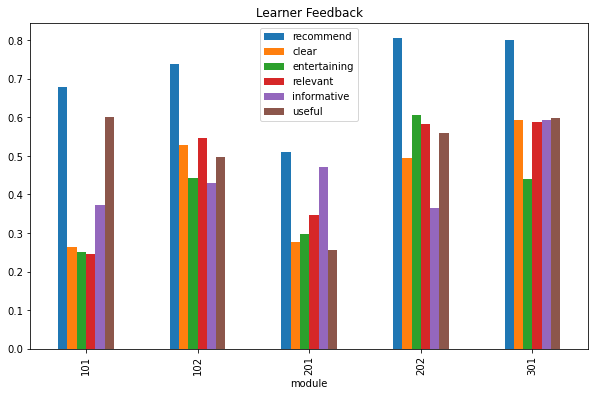

In [11]:
core.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(10,6))

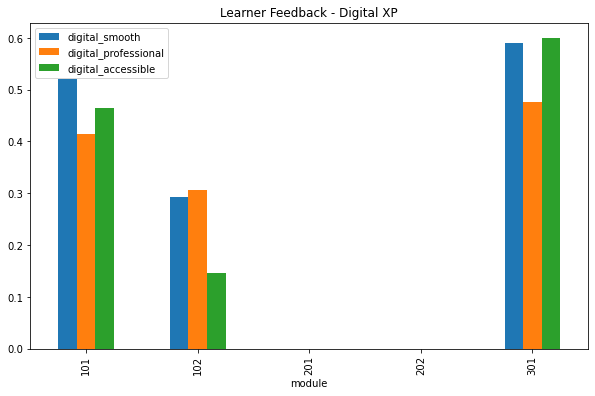

In [12]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

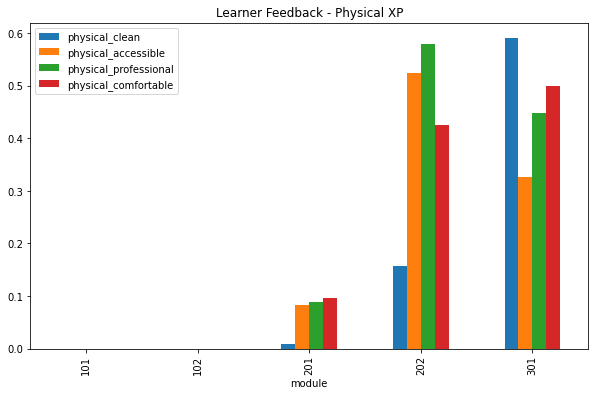

In [13]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

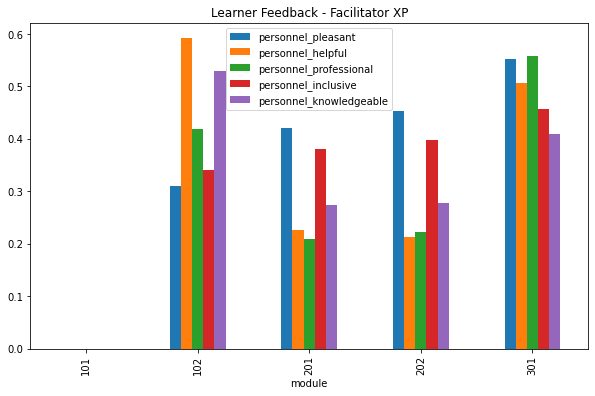

In [14]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

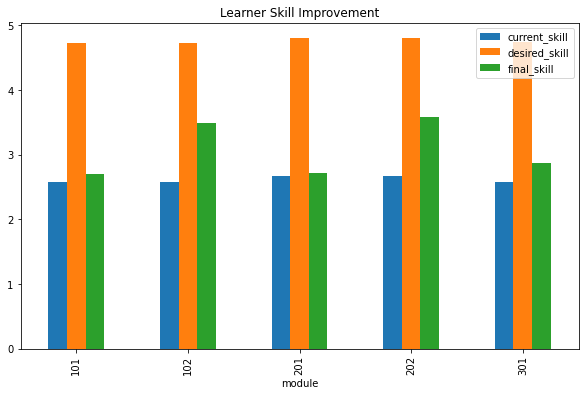

In [15]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [16]:
learning_obj.lo_1.unique()

array(['Exceeded', 'NotMeet', 'Meet'], dtype=object)

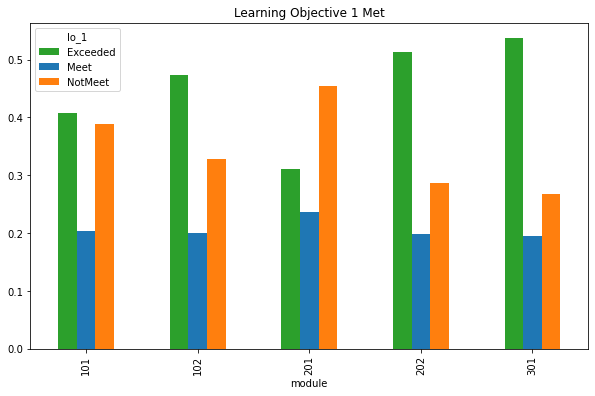

In [17]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

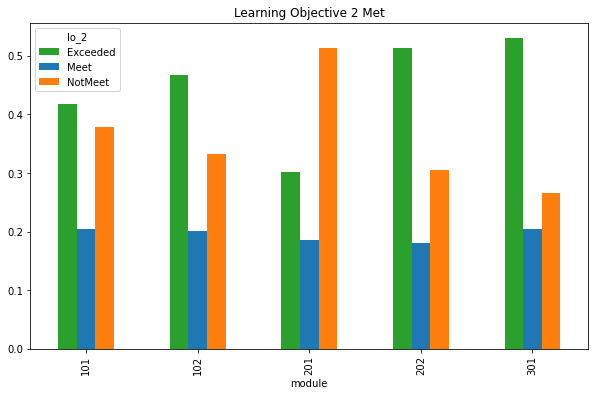

In [18]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [19]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

In [20]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]

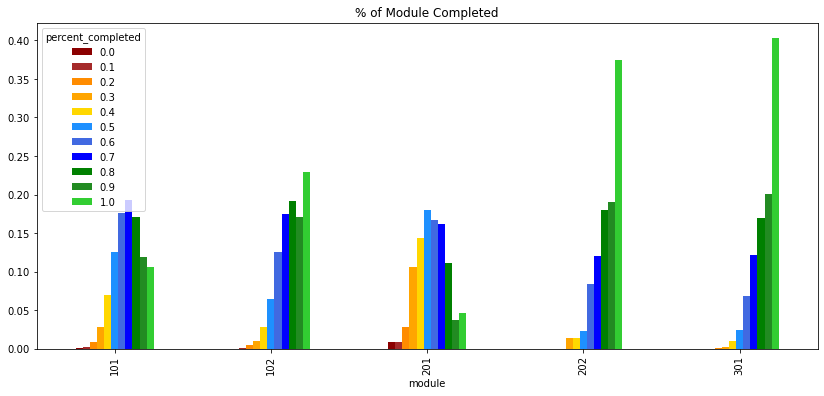

In [21]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

In [22]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,3,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,,
877,I501,107,79,107,138,167,139,92,171
878,I501,91,76,107,145,150,161,97,173
879,I501,101,81,123,141,147,133,121,153
880,I501,103,103,102,119,150,149,102,172
881,I501,96,89,119,133,129,156,110,168
882,I501,101,81,123,139,145,149,89,173
883,I501,92,62,115,149,178,129,113,162
884,I501,89,78,111,154,143,128,113,184
885,I501,79,73,127,133,168,131,120,169


In [23]:
eight_grad=["darkred", "brown", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]

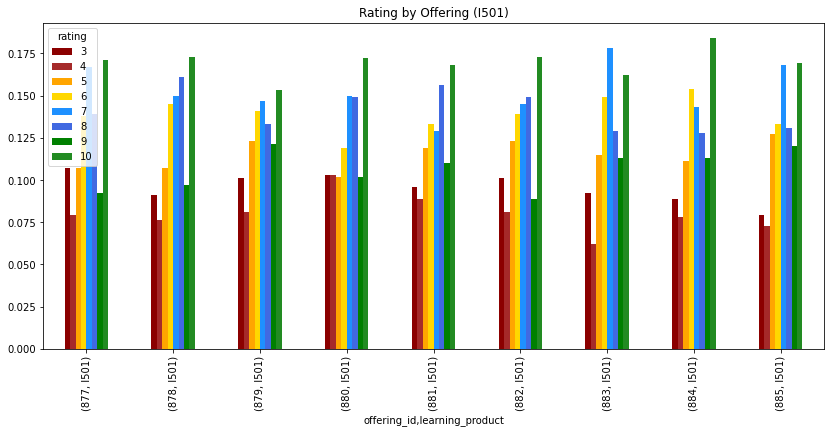

In [24]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=eight_grad)

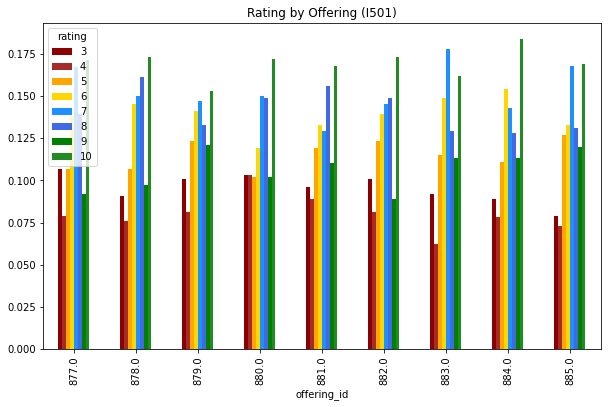

In [25]:
pd.crosstab(df.offering_id.where(df.learning_product=="I501"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (I501)", figsize=(10,6), color=eight_grad)

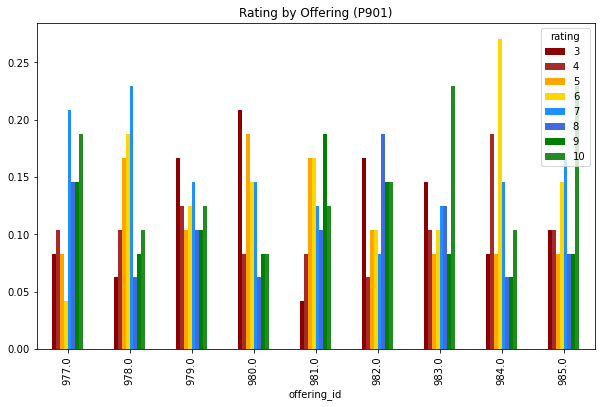

In [26]:
df.groupby(df["offering_id"].where(df.learning_product=="P901"))["rating"].value_counts(normalize=True).unstack().plot(kind='bar', title="Rating by Offering (P901)", figsize=(10,6),
                                                                                                                      color=eight_grad)

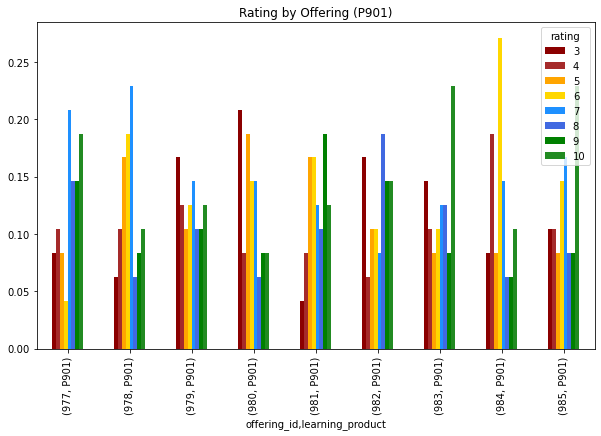

In [27]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(10,6),
                                                                                                                      color=eight_grad)

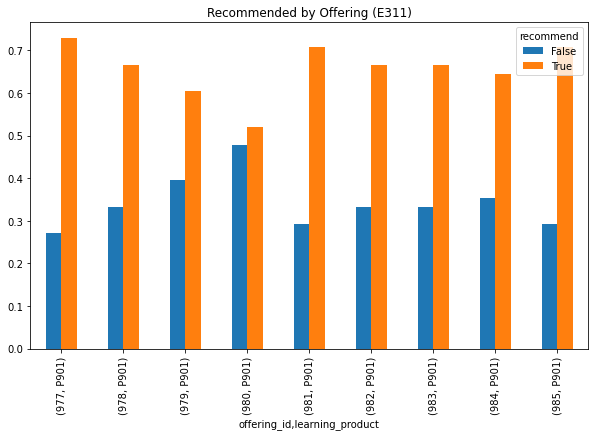

In [28]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(10,6))

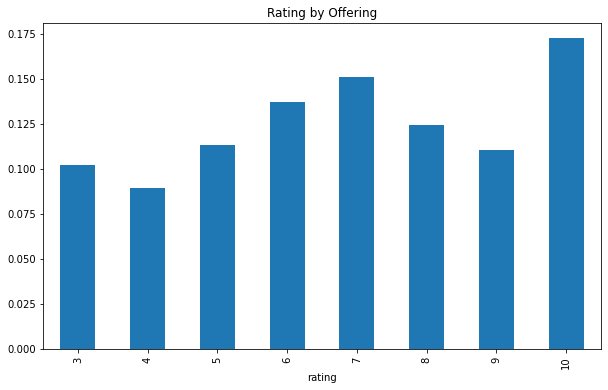

In [29]:
pd.crosstab(df.offering_id, df.rating, normalize="index").agg("mean").plot(kind='bar', title="Rating by Offering", figsize=(10,6))

In [30]:
rating_offering = df[["learning_product", "rating"]]

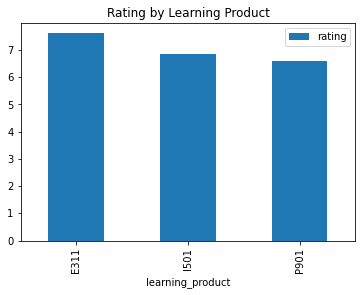

In [31]:
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

In [32]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,7.609000
I501,6.871444
P901,6.594907


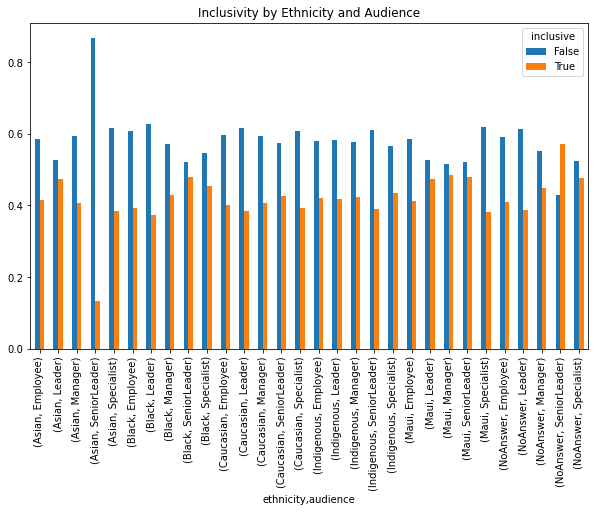

In [33]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(10,6))

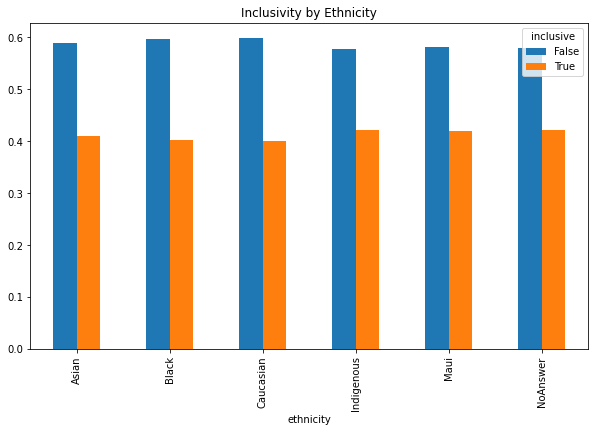

In [34]:
pd.crosstab(df.ethnicity, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(10,6))

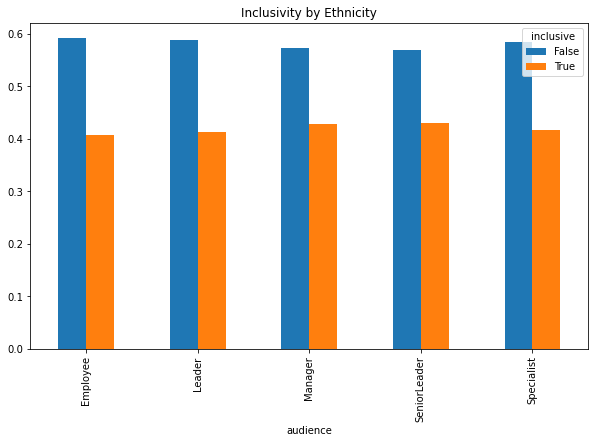

In [35]:
pd.crosstab(df.audience, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(10,6))